# Group Project - Machine Intelligence and Society 2023

### Important Notice

<!-- Markdown!!! -->
The project is about basic machine learning methods and fairness in machine learning associated with the Machine Intelligence and Society 2023 course. The members of this group is following:

<!-- Markdown!!! -->
<!-- 각자 파트/student ID/이름 스펠링 확인!! -->

| Matrikelnummer|  Name        | Responsibility    |    Program                                 |
|:-------------:|:------------:|:-----------------:|:------------------------------------------:|
|    03700000   |  Mingi Kang  |   report /        | Bachelor Elektro- und Informationstechnik  |
|    03722924   |  Semin Kim   | analysis / report | Bachelor Elektro- und Informationstechnik  |
|    03700000   |  Seyoung Kim | research / report | Bachelor Elektro- und Informationstechnik  |
|    03745303   | Taeyoung Kim |    programming    | Bachelor Elektro- und Informationstechnik  |


## INTRODUCTION OF THIS PROJECT

The provided dataset is a subset of the [North Carolina Policing Dataset](https://openpolicing.stanford.edu/data/). 
This includes to identify and deal with any outliers, missing values etc. and to encode and scale features appropriately and the task is to classify if a person will be arrested or not. This project consists of a total of 4 modules: preprocessing, training, validation and testing.

# remove unnecessary code before submit!!!
# comment all code!!!
# all comment start with big alphabet

## PREPROCESSING 

In [1]:
# Remove unnecessary code before submit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [2]:
#Read data
df = pd.read_csv("NC_policing.csv")

Check the component of dataset with method info/head/unique

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state               402087 non-null  object 
 1   stop_date           402087 non-null  object 
 2   driver_gender       402087 non-null  object 
 3   driver_age          401996 non-null  float64
 4   driver_race_raw     402087 non-null  object 
 5   driver_race         402087 non-null  object 
 6   violation           402087 non-null  object 
 7   search_type         402087 non-null  object 
 8   contraband_found    402087 non-null  bool   
 9   stop_outcome        402087 non-null  object 
 10  search_basis        402087 non-null  object 
 11  officer_id          402087 non-null  int64  
 12  drugs_related_stop  4379 non-null    object 
 13  district            402049 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 40.3+ MB


,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3


In [4]:
# Show the number of unique values
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

state: 1 unique values
stop_date: 5632 unique values
driver_gender: 2 unique values
driver_age: 83 unique values
driver_race_raw: 10 unique values
driver_race: 5 unique values
violation: 8 unique values
search_type: 6 unique values
contraband_found: 2 unique values
stop_outcome: 2 unique values
search_basis: 33 unique values
officer_id: 3018 unique values
drugs_related_stop: 1 unique values
district: 57 unique values


In [5]:
#Check the unique values of all data.
for col in df:
    print(df[col].unique())

['NC']
['2000-07-31' '2000-08-01' '2000-08-02' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
['M' 'F']
[23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. nan
 82. 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]
['W N' 'B N' 'U H' 'W H' 'I N' 'U N' 'A N' 'A H' 'B H' 'I H']
['White' 'Black' 'Hispanic' 'Other' 'Asian']
['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop sign/light']
['No Search Conducted' 'Protective Frisk' 'Incident to Arrest' 'Consent'
 'Probable Cause' 'Warrant']
[False  True]
['Arrest' 'No Action']
['No Search Conducted' 'Observation Suspected Contraband'
 'Erratic Suspicious Behaviour' 'Other Official Info'
 'Suspicious Movement' 'Witness Observation' 'Informant Tip'
 'Observation Suspected Contr

### Processing the missing values

In [6]:
#Fill missing values in 'drivers_age' with mean
mean_age = df['driver_age'].mean()
print("Average age is :", mean_age)

Average age is : 41.878103264709104


In [7]:
#All missing values in 'driver_age' fills with average mean
#It was rounded at 소수첫째자리 반올림
df['driver_age'] = df['driver_age'].fillna(int(np.rint(mean_age)))

#Check ob tere are antother missing values
df.isna().sum()

state                      0
stop_date                  0
driver_gender              0
driver_age                 0
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397708
district                  38
dtype: int64

In [8]:
# only 38 data missed, = keinen Einfluss auf dataset
df.dropna(subset=['district'], inplace=True)

#Check ob tere are antother missing values
df.isna().sum()

state                      0
stop_date                  0
driver_gender              0
driver_age                 0
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397670
district                   0
dtype: int64

### 데이터 정리하기(필요한 데이터/불필요데이터 처리, ml위해 데이터 폼 변형etc)

삭제할 컬럼(사용되지 않음) : state, stop_date, driver_race_raw, contraband_found, drug_related_stop, district 혹은 officer_id 둘 중 하나(아직 결정 못함 두 컬럼이 비슷한 관계..)
처리 후 필요최소한 사용 컬럼 : violation, search_type

state : 모든 컬럼 동일값 => ml에 큰 의미x
stop_date : 데이터가 너무 광범위하고, ....
driver_race_raw : dirver_race 컬럼과 유사하다
contraband_found : stop_outcome인 y variable과 유사하다.
drug_related_stop : 너무 많은 값이 빠져있어서 데이터로서의 가치 없음.



In [9]:
df_encoded = df.copy()

# NaN 값이 너무 많은 컬럼 drugs_related_stop
# 모든 값이 동일한 컬럼 state
# 유사한 정보를 가지고 있는 컬럼 driver_race_raw (similar with driver_race)
df_encoded = df_encoded.drop(['stop_date','drugs_related_stop','state','officer_id','district','driver_race_raw','search_type'], axis=1)


# test (remove this code before submit)
df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
driver_race,White,White,Black,Black,Hispanic
violation,Speeding,Speeding,Speeding,Speeding,Speeding
contraband_found,False,False,False,False,False
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted


In [10]:
# IF WE DONT NEED THIS COLUMNS, REMOVE THIS CODE.

# Initialize label encoder
le = LabelEncoder()

# Encode 'contraband_found' column
df_encoded['contraband_found'] = le.fit_transform(df_encoded['contraband_found'])
df_encoded['driver_gender'] = le.fit_transform(df_encoded['driver_gender'])
#df_encoded['stop_outcome'] = le.fit_transform(df_encoded['stop_outcome'])


df_encoded.head().T

,0,1,2,3,4
driver_gender,1,0,0,1,1
driver_age,23.0,29.0,49.0,29.0,24.0
driver_race,White,White,Black,Black,Hispanic
violation,Speeding,Speeding,Speeding,Speeding,Speeding
contraband_found,0,0,0,0,0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted


In [11]:
## MuliLabelBinarizer

from sklearn.preprocessing import MultiLabelBinarizer

# Expand Comma-separated values 
df_encoded['search_basis'] = df_encoded['search_basis'].str.split(',')

mlb = MultiLabelBinarizer()
search_basis_encoded = mlb.fit_transform(df_encoded['search_basis'])
search_basis_df = pd.DataFrame(search_basis_encoded, columns=mlb.classes_)
df_encoded = pd.concat([df_encoded, search_basis_df], axis=1)

# Drop the original 'search_basis' column
df_encoded = df_encoded.drop('search_basis', axis=1)



In [12]:
# One-hot encoding for

for col in ['driver_race','violation']:
    dummies = pd.get_dummies(df_encoded[col], prefix=col)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    df_encoded = df_encoded.drop(col, axis=1)



In [13]:
df_encoded.head()

,driver_gender,driver_age,contraband_found,stop_outcome,Erratic Suspicious Behaviour,Informant Tip,No Search Conducted,Observation Suspected Contraband,Other Official Info,Suspicious Movement,...,driver_race_Other,driver_race_White,violation_DUI,violation_Equipment,violation_Other,violation_Registration/plates,violation_Safe movement,violation_Seat belt,violation_Speeding,violation_Stop sign/light
0,1.0,23.0,0.0,Arrest,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0.0,29.0,0.0,Arrest,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,0.0,49.0,0.0,Arrest,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,29.0,0.0,Arrest,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,24.0,0.0,Arrest,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


## 마지막 Preprocessing 확인

In [14]:
df_encoded.head().T

,0,1,2,3,4
driver_gender,1.0,0.0,0.0,1.0,1.0
driver_age,23.0,29.0,49.0,29.0,24.0
contraband_found,0.0,0.0,0.0,0.0,0.0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
Erratic Suspicious Behaviour,0.0,0.0,0.0,0.0,0.0
Informant Tip,0.0,0.0,0.0,0.0,0.0
No Search Conducted,1.0,1.0,1.0,1.0,1.0
Observation Suspected Contraband,0.0,0.0,0.0,0.0,0.0
Other Official Info,0.0,0.0,0.0,0.0,0.0
Suspicious Movement,0.0,0.0,0.0,0.0,0.0


### Generate two binary classifiers using two different methods of your liking and compare their performances against a dummy classifier, which always predicts “not arrested”.

In [15]:
#Target variable y
encoder = LabelEncoder()
y = df_encoded["stop_outcome"]
y_encoded = encoder.fit_transform(y)


In [16]:
# Splitting Data 
X = df_encoded.drop('stop_outcome', axis=1)
X = X.astype(np.float32) 

y = (df_encoded['stop_outcome'] == "Arrested").astype(int)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Split training set again in to X_train and y_train 
# for the training of the NN and X_valid and y_valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=4)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape)

(225168, 23)
(80418, 23)
(225168, 23)


### only standardization
### only normalization
### std and norm ?


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

col_names = list(X_train.columns)
# Standardization
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

In [19]:
# convert to DataFrame
# Convert the standardized NumPy array back to a DataFrame
X_train_standardized_df = pd.DataFrame(X_train_standardized, columns=X_train.columns)

# Display the top rows of the standardized DataFrame
X_train_standardized_df.head().T


,0,1,2,3,4
driver_gender,0.324522,0.324522,0.324522,0.324522,0.324522
driver_age,0.009759,-0.067102,-1.373741,1.008953,-1.681185
contraband_found,-0.129473,-0.129473,-0.129473,-0.129473,-0.129473
Erratic Suspicious Behaviour,-0.237463,-0.237463,-0.237463,-0.237463,-0.237463
Informant Tip,-0.019661,-0.019661,-0.019661,-0.019661,-0.019661
No Search Conducted,0.400661,0.400661,-2.495875,0.400661,0.400661
Observation Suspected Contraband,-0.143569,-0.143569,-0.143569,-0.143569,-0.143569
Other Official Info,-0.237672,-0.237672,4.207477,-0.237672,-0.237672
Suspicious Movement,-0.072152,-0.072152,-0.072152,-0.072152,-0.072152
Witness Observation,-0.080790,-0.080790,-0.080790,-0.080790,-0.080790


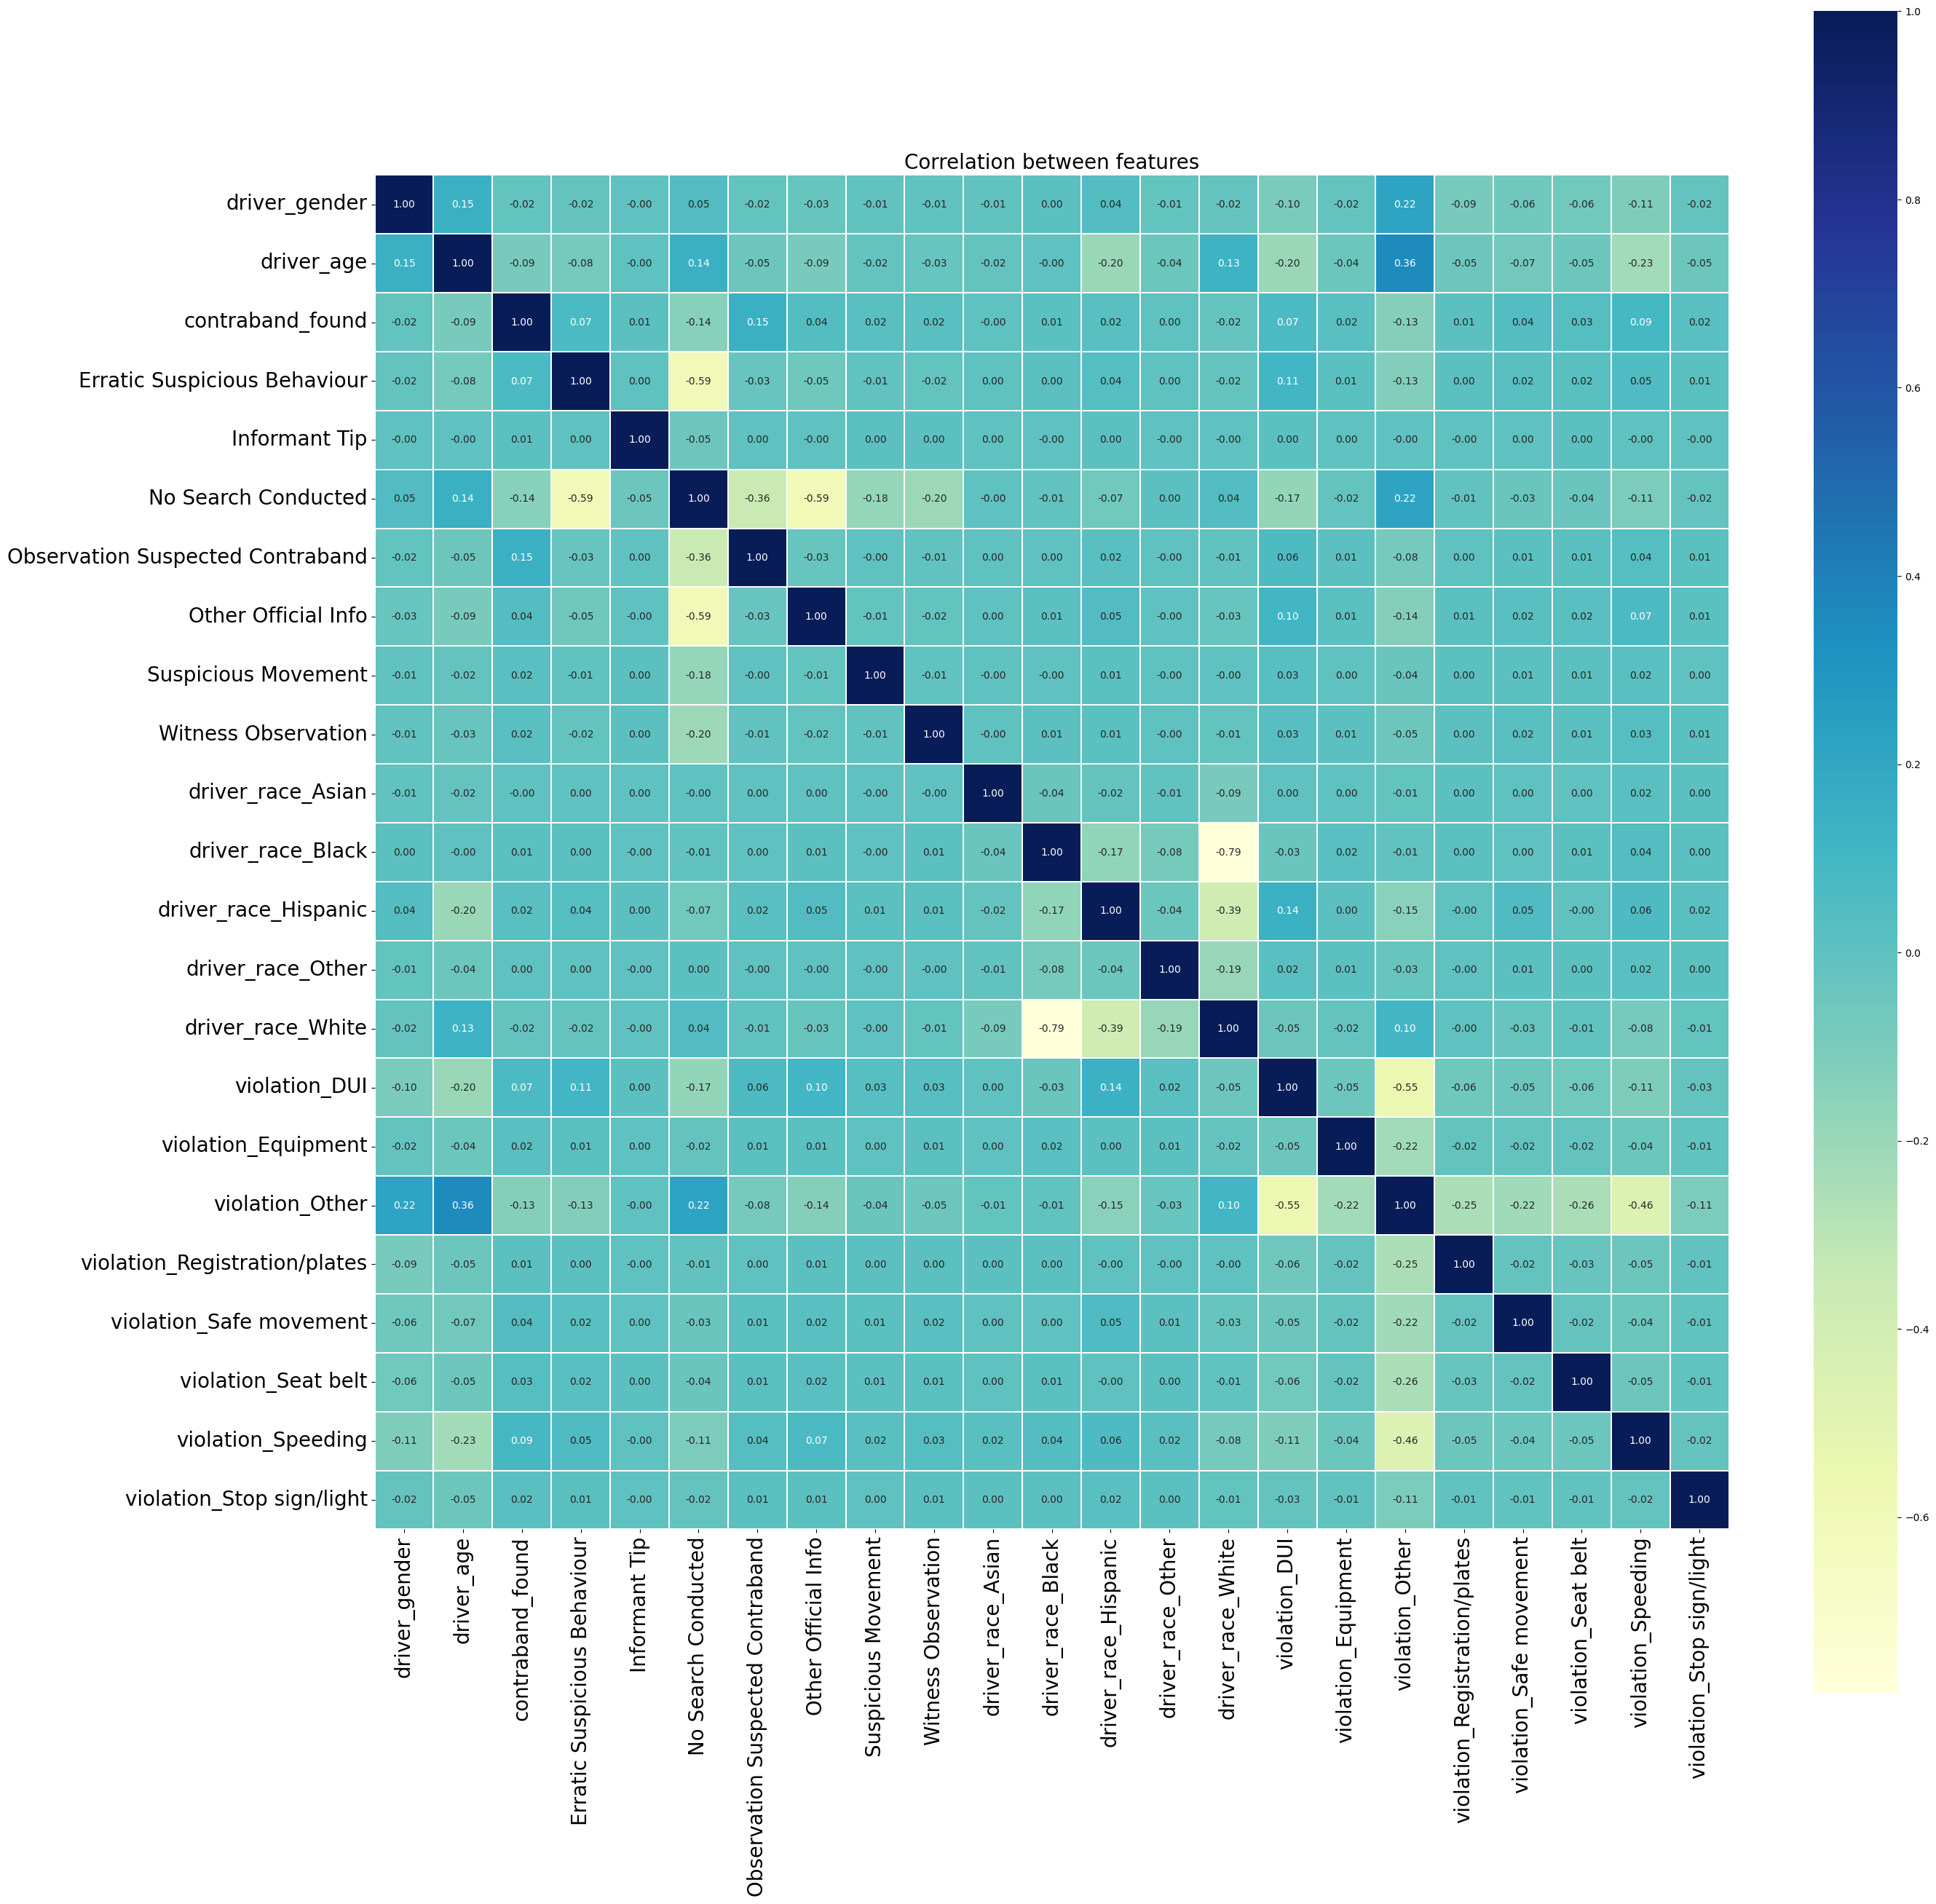

In [20]:
# creating correlation matrix for feature selection
corr = X.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr, linewidths=0.1, square=True, annot=True, cmap='YlGnBu', linecolor="white", fmt='.2f')

# Adjusting the font size for x-axis and y-axis labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('Correlation between features', fontsize=20)
plt.show()


In [21]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/d3/9d/df59bd657de871cd3429d58ccdf1479f13e9aa18c10b5051b2c14249ebbc/tensorflow-2.13.0-cp310-cp310-macosx_10_15_x86_64.whl.metadata
  Using cached tensorflow-2.13.0-cp310-cp310-macosx_10_15_x86_64.whl.metadata (3.2 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/c9/ea/fe2a69cc6cfebf7c7ee8a6357566fc1cbb91632bde5869b669a396a

  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Using cached tensorflow-2.13.0-cp310-cp310-macosx_10_15_x86_64.whl (216.2 MB)
Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Using cached libclang-16.0.6-py2.py3-none-macosx_10_9_x86_64.whl (24.5 MB)
Using cached protobuf-4.24.2-cp37-abi3-macosx_10_9_universal2.whl (409 kB)
Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
Using cached tensorflow_io_gcs_filesystem-0.33.0-cp310-cp310-macosx_10_14_x86_64.whl (1.7 MB)
Using cached google_auth-2.22.0-py2.py3-none-any.whl (181 kB)
Using cached tensorboard_data_server-0.7.1-py3-none-macosx_10_9_x86_64.whl (4.8 MB)
Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
anceled
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.
